In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np
from sklearn.cluster import KMeans
from PIL import Image
from skimage.color import rgb2hsv
import os

In [2]:
os.listdir('F:\Thesis\TrayDataset\TrayDataset\XTest')

['1005a.jpg',
 '2002a.jpg',
 '3004a.jpg',
 '4003a.jpg',
 '5006a.jpg',
 '6004a.jpg',
 '7010a.jpg',
 '8006a.jpg']

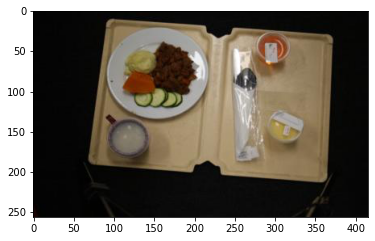

In [6]:
img = Image.open("F:\Thesis\TrayDataset\TrayDataset\XTest\8006a.jpg")
x = np.array(img)
imshow(x)

In [8]:
z = np.dstack((x,rgb2hsv(x)))
z.shape

(256, 416, 6)

# K-Means
The K-Means clustering algorithm only takes 2 dimensional input so I am squishing the X & Y dimension into 1 spatial dimesion
The new dimensions are now 256*416 x 6 == 106496x6

In [9]:
vectorized = np.float32(z.reshape((-1,6)))
vectorized.shape

(106496, 6)

# 
I am picking K = 8 clusters for this image
The algorithm starts with K cluster centroids that are randomly initialized
All pixels are then assigned to their nearest cluster centroid
The cluster centroids are then recalculated and this process repeats until convergence

In [10]:
kmeans = KMeans(random_state=0, init='random', n_clusters=8)
labels = kmeans.fit_predict(vectorized)

In [11]:
labels.shape

(106496,)

In [12]:
pic = labels.reshape(256,416)

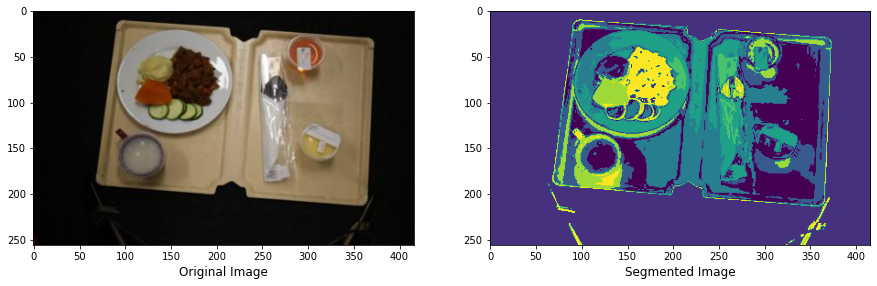

In [13]:
f, axarr = plt.subplots(1,2,figsize=(15,15))
axarr[0].set_xlabel('Original Image', fontsize=12)
axarr[1].set_xlabel('Segmented Image', fontsize=12)  
axarr[0].imshow(x)
axarr[1].imshow(pic)